# ROC曲线

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target.copy()

# 把数据变为极度偏斜的数据
# 把手写数字分为9和非9两大类， 重点关注的是分类为9的数字
y[digits.target==9] = 1
y[digits.target!=9] = 0

In [3]:
from sklearn.model_selection._split import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [4]:
from sklearn.linear_model.logistic import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
decision_scores = log_reg.decision_function(X_test)

In [6]:
from playML.metrics import FPR, TPR

fprs = []
tprs = []
thresholds = np.arange(np.min(decision_scores), np.max(decision_scores), 0.1)
for threshold in thresholds:
    y_predict = np.array(decision_scores >= threshold, dtype=int)
    fprs.append(FPR(y_test, y_predict))
    tprs.append(TPR(y_test, y_predict))

## 手工绘制ROC曲线

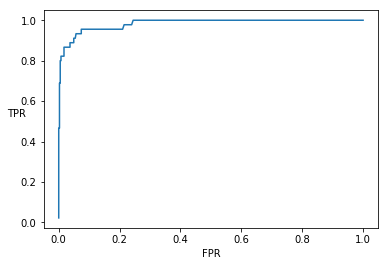

In [8]:
plt.plot(fprs, tprs)
plt.xlabel('FPR')
plt.ylabel('TPR', rotation=0)
plt.show()

## scikit-learn中的ROC

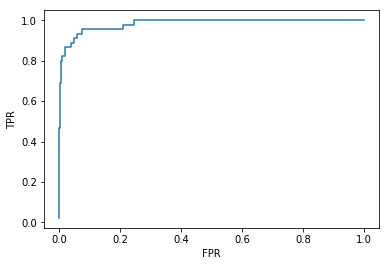

In [9]:
from sklearn.metrics.ranking import  roc_curve

fprs, tprs, thresholds = roc_curve(y_test, decision_scores)
plt.plot(fprs, tprs)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()


In [10]:
# 计算（衡量）曲线下面的面积
from sklearn.metrics.ranking import roc_auc_score

roc_auc_score(y_test, decision_scores)

0.98304526748971188